In [1]:
using BijectiveHilbert
using Plots
using ImageView

In [2]:
function build_hilbert_mapping_2D(n_voxels_per_dim::Vector)

    # Mostly from https://bertvandenbroucke.netlify.app/2019/01/18/space-filling-curves/

    #Number of bits needed per dimension to represent voxels on Hilbert curve
    N_b = ceil.(Int, log2.(n_voxels_per_dim))
    #Map voxel centers to integers
    hilbert_mappings = zeros(Int, n_voxels_per_dim...)
    for i in 0:n_voxels_per_dim[1]-1
        for j in 0:n_voxels_per_dim[2]-1
                #Map voxel index into discretized space
                hilbert_mappings[i+1,j+1] = 
                    encode_hilbert(Compact(Int, N_b), [floor(Int64, (i/n_voxels_per_dim[1])*(2^N_b[1]) + 1),
                                                      floor(Int64, (j/n_voxels_per_dim[2])*(2^N_b[2])) + 1]) #*is floor the right thing to do?
        end
    end

    return hilbert_mappings
end

function spatially_sort_voxels(n_voxels_per_dim::Vector)
    N_b = ceil.(Int, log2.(n_voxels_per_dim))
    to_index = (i,j) -> [floor(Int64, (i/n_voxels_per_dim[1])*(2^N_b[1]) + 1), floor(Int64, (j/n_voxels_per_dim[2])*(2^N_b[2])) + 1]

    indices = [to_index(i,j) for i in 0:n_voxels_per_dim[1]-1 for j in 0:n_voxels_per_dim[2]-1]
    sort!(indices, by = x ->  encode_hilbert(Compact(Int, N_b), x))

    return indices
end


spatially_sort_voxels (generic function with 1 method)

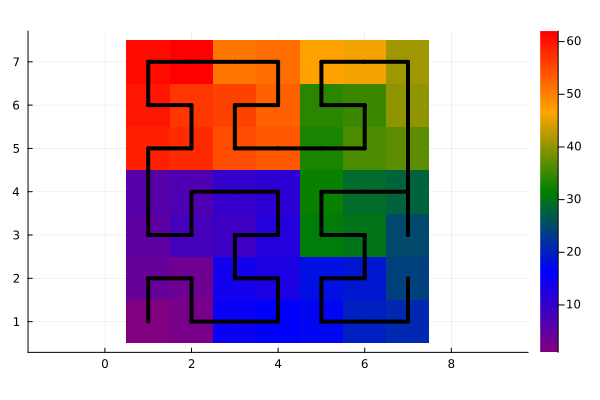

In [3]:
n_voxels_per_dim = [7,7]
hilbert_mapping = build_hilbert_mapping_2D(n_voxels_per_dim)
voxels_sorted = spatially_sort_voxels(n_voxels_per_dim);
h = heatmap(hilbert_mapping, color=:rainbow, aspect_ratio=1, z_order = 1)
#Draw lines on heatmap to visualize ordering better
for i in 1:length(voxels_sorted)-1
    plot!([voxels_sorted[i][1],voxels_sorted[i+1][1]], [voxels_sorted[i][2],voxels_sorted[i+1][2]],
             color = :black, lw = 4, z_order = 2, legend = false)
    
end
display(h)


In [4]:
println(voxels_sorted[1])
println(voxels_sorted[2])

[1, 1]
[1, 2]
